# Read dataset

In [13]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Read dataset from directory
dir_data = './data/'
raw_data = os.path.join(dir_data, 'breast-cancer-wisconsin.data')
data = np.genfromtxt(raw_data, delimiter=",", dtype=str)
label = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
              'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size',
              'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

# Put txt files into DataFrame

In [14]:
arrange_data = []
for line in data:
    arrange_data.append(line)

df = pd.DataFrame(arrange_data)
df.columns = label

# processing with missimg value
for className in df:
    for index in range(len(df[className])):
        if(df[className][index] == '?'):
            df[className][index] = df[className].mode()  # replace missing value with mode

df=df.astype({'Clump Thickness':'int32',
              'Uniformity of Cell Size':'int32',
              'Uniformity of Cell Shape':'int32',
              'Marginal Adhesion':'int32',
              'Single Epithelial Cell Size':'int32',
              'Bare Nuclei':'int32',
              'Bland Chromatin':'int32',
              'Normal Nucleoli':'int32',
              'Mitoses':'int32'})
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Split training data & testing data

In [15]:
bcw_data = df[df.columns[1:-1]]
bcw_label = df['Class']
train_data , test_data , train_label , test_label = train_test_split(bcw_data, bcw_label, test_size=0.33, stratify=bcw_label)

# Convert dataframe into list
train_data = train_data.values.tolist()
train_label = train_label.values.tolist()
test_data = test_data.values.tolist()
test_label = test_label.values.tolist()

# KNN Algorithm(K = 5)
## Euclidean distance

In [16]:
# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return distance**0.5

# Locate the most similar neighbors
def get_neighbors(train_data, train_label, test_row, num_neighbors):
    distances = []
    for index in range(len(train_data)):
        dist = euclidean_distance(test_row, train_data[index])
        distances.append((train_data[index], dist, train_label[index]))
    distances.sort(key=lambda tup: tup[1])
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append([distances[i][0], distances[i][-1]])
    return neighbors

# Make a prediction with neighbors
def predict_classification(train_data, train_label, test_row, num_neighbors):
    neighbors = get_neighbors(train_data, train_label, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# kNN Algorithm
def k_nearest_neighbors(train_data, train_label, test_data, num_neighbors):
    predictions = []
    for row in test_data:
        output = predict_classification(train_data, train_label, row, num_neighbors)
        predictions.append(output)
    return predictions

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# define model parameter
num_neighbors = 5

pred = k_nearest_neighbors(train_data, train_label, test_data, num_neighbors)
print("Accuracy: %.2f %%" % accuracy_metric(test_label, pred))
print("\nConfusion Matrix:")
print(confusion_matrix(test_label, pred))
print("\nClassification Report:")
print(classification_report(test_label, pred))

Accuracy: 97.84 %

Confusion Matrix:
[[147   4]
 [  1  79]]

Classification Report:
              precision    recall  f1-score   support

           2       0.99      0.97      0.98       151
           4       0.95      0.99      0.97        80

   micro avg       0.98      0.98      0.98       231
   macro avg       0.97      0.98      0.98       231
weighted avg       0.98      0.98      0.98       231



### Compare the accuracy with different values of K (Euclidean distance)

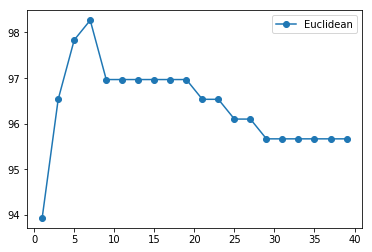

In [17]:
K_accuracy_euclidean = []
for values in range(1, 41, 2):
    pred = k_nearest_neighbors(train_data, train_label, test_data, values)
    K_accuracy_euclidean.append(accuracy_metric(test_label, pred))
plt.plot(range(1, 41, 2), K_accuracy_euclidean, label="Euclidean", marker='o')
plt.legend()
plt.show()

## Chebyshev distance

In [18]:
# Calculate the Chebyshev distance between two vectors
def chebyshev_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += np.max(np.abs(row1[i] - row2[i]))
    return distance

# Locate the most similar neighbors
def get_neighbors(train_data, train_label, test_row, num_neighbors):
    distances = []
    for index in range(len(train_data)):
        dist = chebyshev_distance(test_row, train_data[index])
        distances.append((train_data[index], dist, train_label[index]))
    distances.sort(key=lambda tup: tup[1])
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append([distances[i][0], distances[i][-1]])
    return neighbors

# Make a prediction with neighbors
def predict_classification(train_data, train_label, test_row, num_neighbors):
    neighbors = get_neighbors(train_data, train_label, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# kNN Algorithm
def k_nearest_neighbors(train_data, train_label, test_data, num_neighbors):
    predictions = []
    for row in test_data:
        output = predict_classification(train_data, train_label, row, num_neighbors)
        predictions.append(output)
    return predictions

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# define model parameter
num_neighbors = 5

pred = k_nearest_neighbors(train_data, train_label, test_data, num_neighbors)
print("Accuracy: %.2f %%" % accuracy_metric(test_label, pred))
print("\nConfusion Matrix:")
print(confusion_matrix(test_label, pred))
print("\nClassification Report:")
print(classification_report(test_label, pred))

Accuracy: 97.40 %

Confusion Matrix:
[[147   4]
 [  2  78]]

Classification Report:
              precision    recall  f1-score   support

           2       0.99      0.97      0.98       151
           4       0.95      0.97      0.96        80

   micro avg       0.97      0.97      0.97       231
   macro avg       0.97      0.97      0.97       231
weighted avg       0.97      0.97      0.97       231



### Compare the accuracy with different values of K (Chebyshev distance)

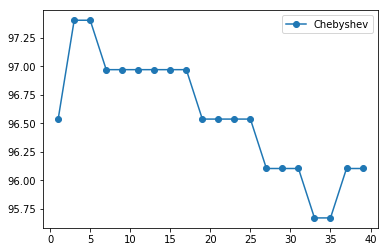

In [19]:
K_accuracy_chebyshev = []
for values in range(1, 41, 2):
    pred = k_nearest_neighbors(train_data, train_label, test_data, values)
    K_accuracy_chebyshev.append(accuracy_metric(test_label, pred))
plt.plot(range(1, 41, 2), K_accuracy_chebyshev, label="Chebyshev", marker='o')
plt.legend()
plt.show()

## Jaccard similarity

In [20]:
# Calculate the Jaccard similarity between two vectors
def jaccard_similarity(row1, row2):
    s1 = set(row1)
    s2 = set(row2)
    return 1 - (len(s1.intersection(s2)) / len(s1.union(s2)))

# Locate the most similar neighbors
def get_neighbors(train_data, train_label, test_row, num_neighbors):
    distances = []
    for index in range(len(train_data)):
        dist = jaccard_similarity(test_row, train_data[index])
        distances.append((train_data[index], dist, train_label[index]))
    distances.sort(key=lambda tup: tup[1])
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append([distances[i][0], distances[i][-1]])
    return neighbors

# Make a prediction with neighbors
def predict_classification(train_data, train_label, test_row, num_neighbors):
    neighbors = get_neighbors(train_data, train_label, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# kNN Algorithm
def k_nearest_neighbors(train_data, train_label, test_data, num_neighbors):
    predictions = []
    for row in test_data:
        output = predict_classification(train_data, train_label, row, num_neighbors)
        predictions.append(output)
    return predictions

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# define model parameter
num_neighbors = 5

pred = k_nearest_neighbors(train_data, train_label, test_data, num_neighbors)
print("Accuracy: %.2f %%" % accuracy_metric(test_label, pred))
print("\nConfusion Matrix:")
print(confusion_matrix(test_label, pred))
print("\nClassification Report:")
print(classification_report(test_label, pred))

Accuracy: 95.24 %

Confusion Matrix:
[[145   6]
 [  5  75]]

Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.96      0.96       151
           4       0.93      0.94      0.93        80

   micro avg       0.95      0.95      0.95       231
   macro avg       0.95      0.95      0.95       231
weighted avg       0.95      0.95      0.95       231



### Compare the accuracy with different values of K (Jaccard similarity)

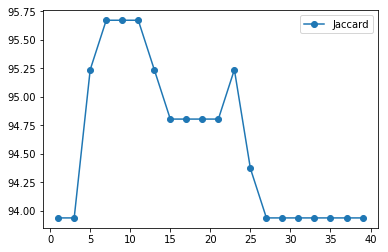

In [21]:
K_accuracy_jaccard = []
for values in range(1, 41, 2):
    pred = k_nearest_neighbors(train_data, train_label, test_data, values)
    K_accuracy_jaccard.append(accuracy_metric(test_label, pred))
plt.plot(range(1, 41, 2), K_accuracy_jaccard, label="Jaccard", marker='o')
plt.legend()
plt.show()

## Cosine similarity

In [22]:
# Calculate the Cosine similarity between two vectors
def cosine_similarity(row1, row2):
    dot = np.dot(row1, row2)
    norma = np.linalg.norm(row1)
    normb = np.linalg.norm(row2)
    return dot / (norma * normb)

# Locate the most similar neighbors
def get_neighbors(train_data, train_label, test_row, num_neighbors):
    distances = []
    for index in range(len(train_data)):
        dist = cosine_similarity(test_row, train_data[index])
        distances.append((train_data[index], dist, train_label[index]))
    distances.sort(key=lambda tup: tup[1], reverse=True)
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append([distances[i][0], distances[i][-1]])
    return neighbors

# Make a prediction with neighbors
def predict_classification(train_data, train_label, test_row, num_neighbors):
    neighbors = get_neighbors(train_data, train_label, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# kNN Algorithm
def k_nearest_neighbors(train_data, train_label, test_data, num_neighbors):
    predictions = []
    for row in test_data:
        output = predict_classification(train_data, train_label, row, num_neighbors)
        predictions.append(output)
    return predictions

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# define model parameter
num_neighbors = 5

pred = k_nearest_neighbors(train_data, train_label, test_data, num_neighbors)
print("Accuracy: %.2f %%" % accuracy_metric(test_label, pred))
print("\nConfusion Matrix:")
print(confusion_matrix(test_label, pred))
print("\nClassification Report:")
print(classification_report(test_label, pred))

Accuracy: 89.18 %

Confusion Matrix:
[[135  16]
 [  9  71]]

Classification Report:
              precision    recall  f1-score   support

           2       0.94      0.89      0.92       151
           4       0.82      0.89      0.85        80

   micro avg       0.89      0.89      0.89       231
   macro avg       0.88      0.89      0.88       231
weighted avg       0.90      0.89      0.89       231



### Compare the accuracy with different values of K (Cosine similarity)

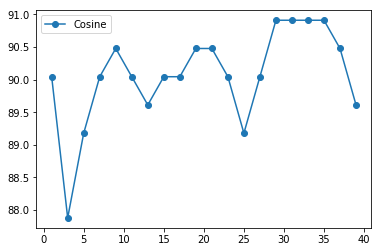

In [23]:
K_accuracy_cosine = []
for values in range(1, 41, 2):
    pred = k_nearest_neighbors(train_data, train_label, test_data, values)
    K_accuracy_cosine.append(accuracy_metric(test_label, pred))
plt.plot(range(1, 41, 2), K_accuracy_cosine, label="Cosine", marker='o')
plt.legend()
plt.show()

# Compare the accuracy with different  similarity function

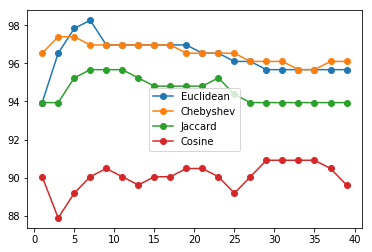

In [24]:
plt.plot(range(1, 41, 2), K_accuracy_euclidean, label="Euclidean", marker='o')
plt.plot(range(1, 41, 2), K_accuracy_chebyshev, label="Chebyshev", marker='o')
plt.plot(range(1, 41, 2), K_accuracy_jaccard, label="Jaccard", marker='o')
plt.plot(range(1, 41, 2), K_accuracy_cosine, label="Cosine", marker='o')
plt.legend()
plt.show()